In [ ]:
# Install libraries
%pip install pandas numpy scikit-learn seaborn matplotlib


In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [27]:
data = pd.read_csv('../Datasets/CarPrice_Assignment.csv')

In [28]:
# Remove the 'price' column from the list of features
features = data.drop(columns=['price']).columns.tolist()

In [29]:
# Data Preprocessing
numeric_features = [feature for feature in features if data[feature].dtype in ['int64', 'float64']]
categorical_features = [feature for feature in features if data[feature].dtype == 'object']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [30]:
# Define the model
model = LinearRegression()

In [31]:
# Define the feature selection
selector = SelectKBest(score_func=f_regression)

In [32]:
# Define the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('selector', selector),
    ('model', model)])

In [33]:
# Split the data into train and test sets
X = data.drop(columns=['price'])  # Features
y = data['price']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Fit the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['car_ID', 'symboling',
                                                   'wheelbase', 'carlength',
                                                   'carwidth', 'carheight',
                                                   'curbweight', 'enginesize',
                                                   'boreratio', 'stroke',
                                                   'compressionratio',
                                                   'horsepower', 'peakrpm',
                                                   'citympg', 'highwaympg']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['CarName', 'fueltype',
                                                   'aspiration', 'doornumber',
                                                   'carbody', 'drivewheel',
                                                   'enginelocation',
                                                   'enginetype',
                                                   'cylindernumber',
                                                   'fuelsystem'])])),
                ('selector',
                 SelectKBest(score_func=<function f_regression at 0x000001934BCA6480>)),
                ('model', LinearRegression())])

In [35]:
# Model Evaluation
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 10532498.558954746
R-squared (R2): 0.8665826944004982


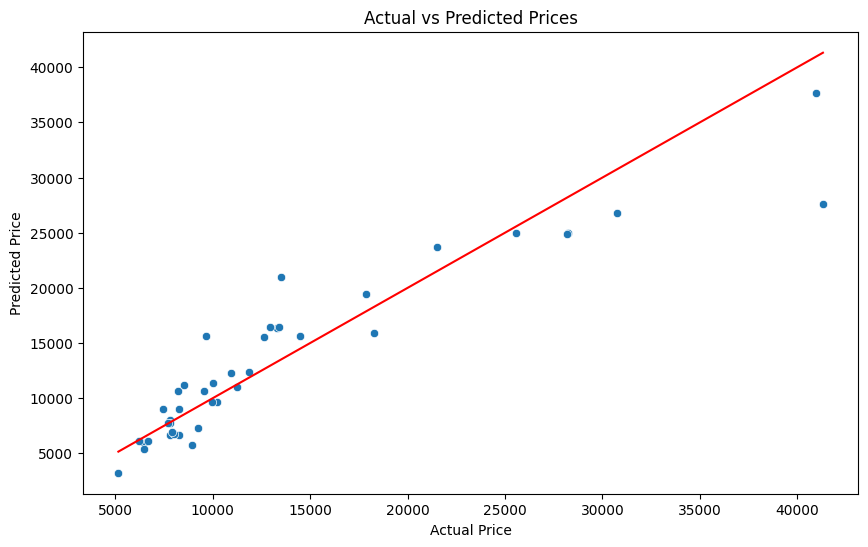

In [36]:
# Plotting Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")

# Adding a line of equality (y=x) to indicate perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')

plt.show()

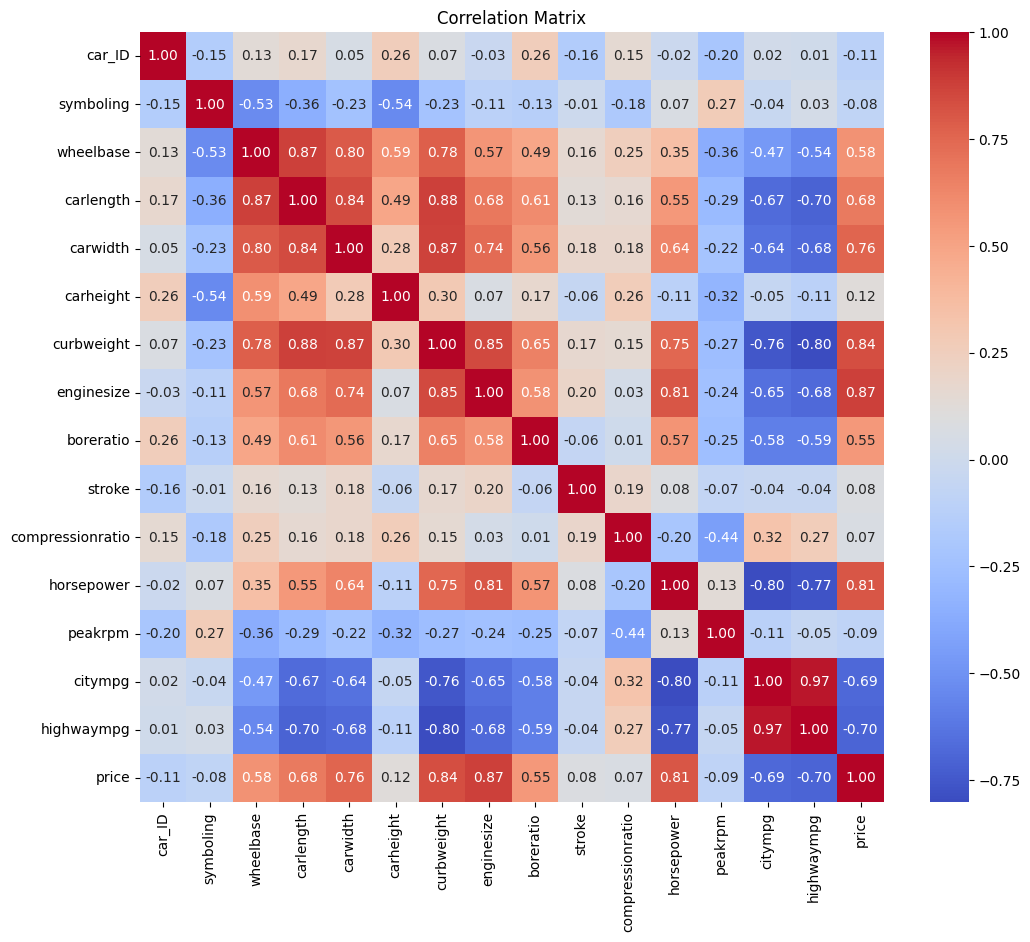

In [37]:
# Compute the correlation matrix
# Select only the numerical columns
numerical_data = data.select_dtypes(include='number')
correlation_matrix = numerical_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [38]:
# Additional Progress Report
# Print the coefficients of the linear regression model
print("\nLinear Regression Coefficients:")
print(pipeline.named_steps['model'].coef_)


Linear Regression Coefficients:
[  196.88476299  1473.57176293    76.76566304  3053.94381925
  1316.50442525  -769.81535876   766.95581504  -945.32159249
  1187.35470104 -2977.86905351]


In [39]:
# Feature Importance
# Extracting feature names from preprocessor and selector steps
numeric_feature_names = pipeline.named_steps['preprocessor'].transformers_[0][2]
categorical_feature_names = pipeline.named_steps['preprocessor'].transformers_[1][1] \
                                .named_steps['onehot'].get_feature_names_out(input_features=categorical_features)
feature_names = list(numeric_feature_names) + list(categorical_feature_names)

# Getting the selected features after feature selection
selected_features_indices = pipeline.named_steps['selector'].get_support(indices=True)
selected_features = [feature_names[i] for i in selected_features_indices]

# Printing feature importance (coefficients) along with feature names
feature_importance = pd.Series(pipeline.named_steps['model'].coef_, index=selected_features)
print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
carlength               196.884763
carwidth               1473.571763
curbweight               76.765663
enginesize             3053.943819
horsepower             1316.504425
citympg                -769.815359
highwaympg              766.955815
drivewheel_fwd         -945.321592
drivewheel_rwd         1187.354701
cylindernumber_four   -2977.869054
dtype: float64
